### Helper methods

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from pathlib import Path

def toggle_rhs(t, y, alpha, beta, n):
    u, v = y
    du = alpha / (1 + v**n) - u
    dv = beta  / (1 + u**n) - v
    return [du, dv]

def make_rhs(alpha: float, beta: float, n: float):
    def rhs(t, y):
        u, v = y
        du = alpha / (1.0 + v**n) - u
        dv = beta  / (1.0 + u**n) - v
        return [du, dv]
    return rhs

def simulate(alpha, beta, n, t_span, t_eval, y0):
    rhs = make_rhs(alpha, beta, n)
    sol = solve_ivp(rhs, t_span, y0, t_eval=t_eval, rtol=1e-7, atol=1e-9)
    return sol

### Simulation

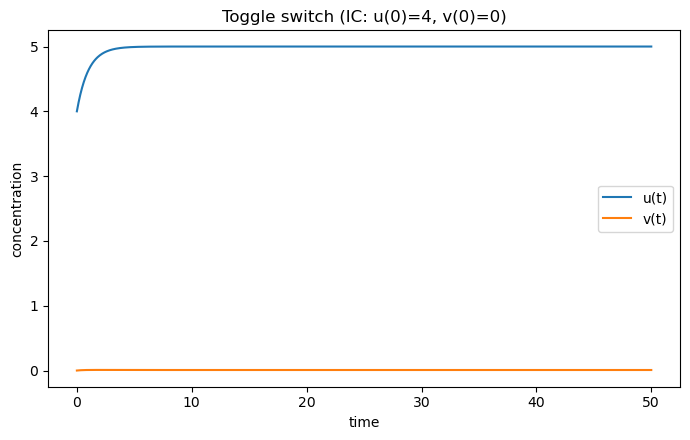

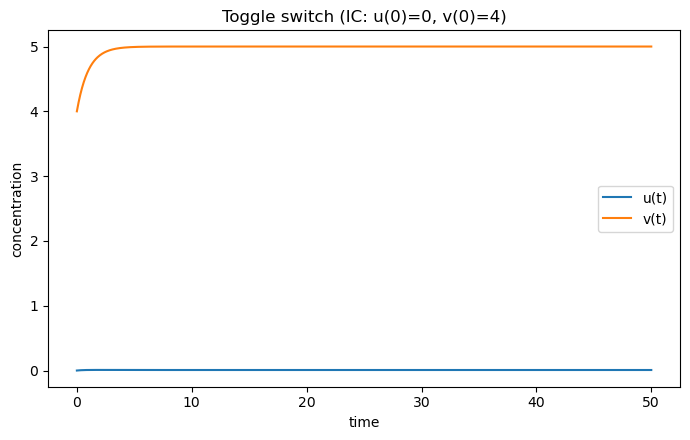

In [2]:
alpha, beta, n = 5.0, 5.0, 4.0
t_span = (0.0, 50.0)
t_eval = np.linspace(t_span[0], t_span[1], 1001)

# init condition 1
ic1 = [4.0, 0.0]
sol1 = simulate(alpha, beta, n, t_span, t_eval, ic1)
plt.figure(figsize=(7, 4.5))
plt.plot(sol1.t, sol1.y[0], label="u(t)")
plt.plot(sol1.t, sol1.y[1], label="v(t)")
plt.xlabel("time")
plt.ylabel("concentration")
plt.title("Toggle switch (IC: u(0)=4, v(0)=0)")
plt.legend()
plt.tight_layout()
plt.show()

# init condition 2
ic2 = [0.0, 4.0]
sol2 = simulate(alpha, beta, n, t_span, t_eval, ic2)
plt.figure(figsize=(7, 4.5))
plt.plot(sol2.t, sol2.y[0], label="u(t)")
plt.plot(sol2.t, sol2.y[1], label="v(t)")
plt.xlabel("time")
plt.ylabel("concentration")
plt.title("Toggle switch (IC: u(0)=0, v(0)=4)")
plt.legend()
plt.tight_layout()
plt.show()

### Answer

#### What do the simulation results show about the long-term behavior of the toggle switch
Two distinct initial conditions converge to two different **stable steady states**:  
- Initial state \([u(0), v(0)] = [4, 0]\) converges to a **high-U, low-V** steady state.  
- Initial state \([u(0), v(0)] = [0, 4]\) converges to a **low-U, high-V** steady state.  
This indicates **dependence on initial conditions**, with the system settling into different states over long timescales.

#### Why is this system considered "bistable"?
The system possesses **two attractors** (stable equilibria). When the Hill coefficient \(n\) is sufficiently large and the synthesis rates \(\alpha, \beta\) are high enough, mutual repression makes both “\(U\) represses \(V\)” and “\(V\) represses \(U\)” self-sustaining:
- If \(U\) is high, it continually suppresses \(V\), stabilizing the **\(U\)-high, \(V\)-low** state.  
- If \(V\) is high, it continually suppresses \(U\), stabilizing the **\(V\)-high, \(U\)-low** state.  
Hence, the system exhibits **two** stable states—i.e., **bistability**.

####  What do the two different stable states correspond to in terms of which gene is considered "ON" and which is "OFF"?
- **State 1: \(U\) ON, \(V\) OFF** (\(u\) high, \(v\) low): gene \(U\) dominates expression and represses \(V\).  
- **State 2: \(U\) OFF, \(V\) ON** (\(u\) low, \(v\) high): gene \(V\) dominates expression and represses \(U\).
